## Validation du code | Test de comparaison des moyennes d'intensité sur les deux jeux d'AGB | 16 parcelles - 85 parcelles

### Bibliothèques

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Affichage pimpé

In [77]:
plt.style.use("seaborn")
mpl.rcParams['figure.dpi'] = 100

### Chargement des données | Image satellite - Relevé topographique

In [78]:
band1 = np.load("../data/band1.npy")
band2 = np.load("../data/band2.npy")

### Chargement de ROI - COORDONNEES

In [79]:
def loadParcels16(num = None):
    if num == None: # On charge toutes les parcelles dans une liste
        parcels = []
        for i in range(1,17):
            parcels.append(np.loadtxt("../data/16ROI/indcsROI_PAR" +"{:02d}".format(i)+ ".dat"))
        return [x.astype(int) for x in parcels]
    else: #  On charge uniquemnent la parcelle numéro "num"
        parcel = np.loadtxt("../data/16ROI/indcsROI_PAR" +"{:02d}".format(num)+ ".dat")
        return parcel.astype(int)

In [80]:
def loadParcels85(numParcel = None, numSubParcel = None):
    if numParcel == None: # On charge toutes les parcelles dans une liste
        parcels = []
        for i in range(1,17):
            if i != 16 :
                for j in range(1,5):
                    parcels.append(np.loadtxt("../data/85ROI/indcsROI_PAR" +"{:02d}".format(i)+"_"+"{:01d}".format(j)+ ".dat"))
            elif i == 16 :
                for j in range(1,26):
                    parcels.append(np.loadtxt("../data/85ROI/indcsROI_PAR" +"{:02d}".format(i)+"_"+"{:03d}".format(j)+ ".dat"))
        return [x.astype(int) for x in parcels]
    else: #  On charge uniquemnent la parcelle numéro "num"
        if numParcel != 16 :   
            parcel = np.loadtxt("../data/85ROI/indcsROI_PAR" +"{:02d}".format(numParcel)+"_"+"{:01d}".format(numSubParcel)+ ".dat")
        elif numParcel == 16 : 
            parcel = np.loadtxt("../data/85ROI/indcsROI_PAR" +"{:02d}".format(numParcel)+"_"+"{:03d}".format(numSubParcel)+ ".dat")
        return parcel.astype(int)

### Chargement des ROI - BIOMASSE

In [81]:
def loadBiomass16(num = None):
    if num == None : 
        bmssList = np.loadtxt("../data/16insituAGB.dat")
    else:
        l = np.loadtxt("../data/16insituAGB.dat")
        bmssList = l[num - 1]
    return bmssList

In [82]:
def loadBiomass85(num = None):
    if num == None : 
        bmssList = np.loadtxt("../data/85insituAGB.dat")
    else:
        l = np.loadtxt("../data/85insituAGB.dat")
        bmssList = l[num - 1]
    return bmssList

### Affichage des ROI | Jeu de 16 parcelles 

In [83]:
def plotParcels16(numList = None):
    band2 = np.load("../data/band2.npy")
    plt.figure(1)
    plt.imshow(band2)
    if numList == None :
        Parcels = loadParcels16()
        for i in range(16):
            X = Parcels[i]
            plt.scatter(X[:,0], X[:,1])
            plt.savefig("parcel.png")
    else:
        Parcels = loadParcels16()
        for j in numList:
            X = Parcels[j]
            plt.scatter(X[:,0], X[:,1])
            plt.savefig("parcel.png")

In [84]:
#plotParcels16()

### Affichage des ROI | Jeu de 85 parcelles 

In [85]:
def plotParcels85(numList = None):
    band2 = np.load("../data/band2.npy")
    plt.figure(1, figsize = (30,12))
    plt.imshow(band2)
    if numList == None :
        Parcels = loadParcels85()
        for i in range(85):
            X = Parcels[i]
            plt.scatter(X[:,0], X[:,1],0.1)
            plt.savefig("parcel.png")
    else:
        Parcels = loadParcels85()
        for j in range(85):
            X = Parcels[j]
            plt.scatter(X[:,0], X[:,1],0.1)
            plt.savefig("parcel.png")

In [86]:
#plotParcels85()

### INTENSITE D'UNE ZONE

In [87]:
def IntensityZone(X,img):
    IntTab = []
    n,m = np.shape(X)
    for i in range(n):
        IntTab.append(img[X[i][1],X[i][0]])
    Intmean = np.mean(np.array(IntTab))
    return Intmean, IntTab

### CORRESPONDANCE DES JEUX DE PARCELLES
Il retourne la liste des indices des sous parcelles correspondantes pour chacune des 16 grandes parcelles, soit des listes de nombres entre 1 et 85.

In [88]:
def correspParcels():
    listIndices = []
    for i in range(0,15) :
        l = [i for i in range(i*4,(i+1)*4)]
        listIndices.append(l)
    listIndices.append([i for i in range(60,85)])
    return listIndices

In [89]:
correspParcels()

[[0, 1, 2, 3],
 [4, 5, 6, 7],
 [8, 9, 10, 11],
 [12, 13, 14, 15],
 [16, 17, 18, 19],
 [20, 21, 22, 23],
 [24, 25, 26, 27],
 [28, 29, 30, 31],
 [32, 33, 34, 35],
 [36, 37, 38, 39],
 [40, 41, 42, 43],
 [44, 45, 46, 47],
 [48, 49, 50, 51],
 [52, 53, 54, 55],
 [56, 57, 58, 59],
 [60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84]]

-----------------------------------------------------------------------------------
### PROGRAMME PRINCIPAL
-----------------------------------------------------------------------------------

In [90]:
indices = np.linspace(1,16,16)

In [101]:
def main(img):
    # ABSCISSES
    indices = np.linspace(1,16,16)
    
    ################################################
    # 4 jeux de données pour les graphes | ORDONNEES
    ################################################
    
    # Les valeurs de biomasse pour les 16 parcelles (16 valeurs)
    valBiomass16ROI = loadBiomass16()
    
    # Moyennes de biomasse pour les sous-parcelles (16 valeurs)
    valBiomass85ROI = loadBiomass85()
    Indices85 = correspParcels()
    
    meanBiomassList = []
    for i in range(len(Indices85)):
        print(i)
        print(Indices85[i])
        mean = 0
        for j in Indices85[i]:
            mean += valBiomass85ROI[j]
        mean /= len(Indices85[i])
        meanBiomassList.append(mean)
    
    # Intensités pour les 16 parcelles (16 valeurs)
    X16 = loadParcels16()
    listInt16 = []
    for i in range(len(X16)):
        intmean = IntensityZone(X16[i],img)[0]
        listInt16.append(intmean)
    
    # Moyennes des intensités des sous-parcelles (16 valeurs)
    X85 = loadParcels85()
    listInt85_to_16 = []
    
    for i in range(16):
        meanInt = 0
        for j in Indices85[i]:
            meanInt += IntensityZone(X85[j],img)[0]
        meanInt /= len(Indices85[i])
        listInt85_to_16.append(meanInt)
    
    
    fig, ax = plt.subplots(2,2, figsize = (8,8))
    
    ax[0,0].plot(indices,valBiomass16ROI)
    ax[0,0].set_title("Biomasse des 16  ROI")
    
    ax[0,1].plot(indices,meanBiomassList)
    ax[0,1].set_title("Moyennes de biomasse des 85  ROI")
    
    ax[1,0].plot(indices,listInt16)
    ax[1,0].set_title("Intensités des 16  ROI")
    
    ax[1,1].plot(indices,listInt85_to_16)
    ax[1,1].set_title("Moyennes des intensités des 85  ROI")
    
    fig.suptitle("Comparaison des données Biomasse et intensité | 16 parcelles - 85 parcelles")
    
    plt.savefig("../results/testMoyennesBiomasseIntensite.png")


0
[0, 1, 2, 3]
1
[4, 5, 6, 7]
2
[8, 9, 10, 11]
3
[12, 13, 14, 15]
4
[16, 17, 18, 19]
5
[20, 21, 22, 23]
6
[24, 25, 26, 27]
7
[28, 29, 30, 31]
8
[32, 33, 34, 35]
9
[36, 37, 38, 39]
10
[40, 41, 42, 43]
11
[44, 45, 46, 47]
12
[48, 49, 50, 51]
13
[52, 53, 54, 55]
14
[56, 57, 58, 59]
15
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]


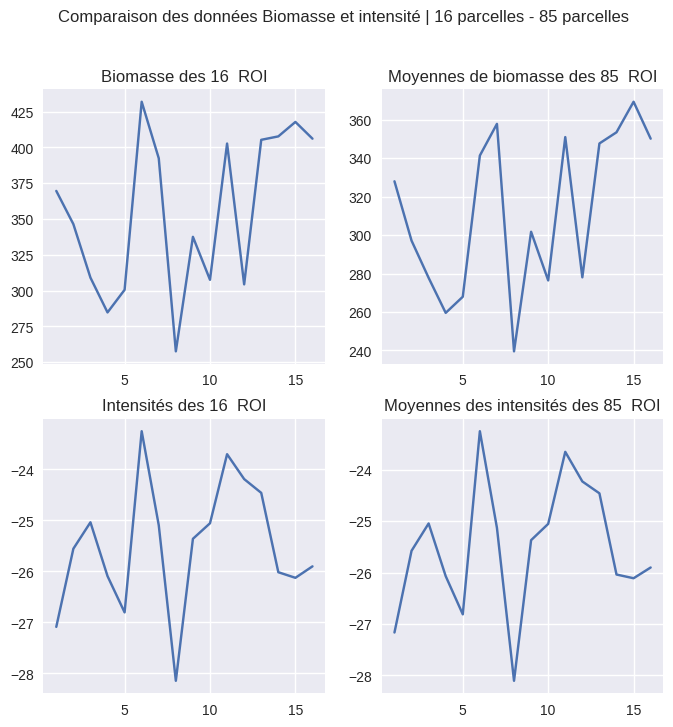

In [102]:
img = 10*np.log(band2/band1)
main(img)